In [2]:
# importing libraries
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#importing logistic regression and decision tree model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#importing functiontransformer and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


In [5]:
# importing our data
df = pd.read_csv('train.csv',usecols=['Fare','Survived','Age'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
# checking null value
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [7]:
# replacing null value using mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-7-b82ac238d83b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [8]:
# spliting our data into feature and target
X = df.drop('Survived',axis=1)
y = df['Survived']

In [9]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<ipython-input-20-0aace87815f0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
<ipython-input-20-0aace87815f0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


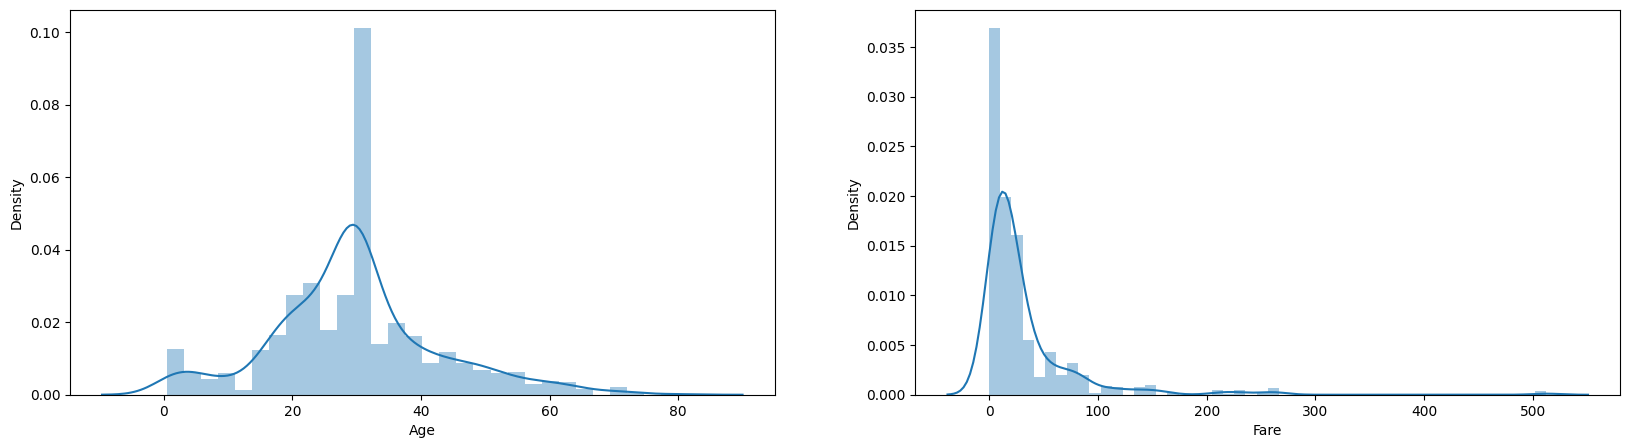

In [20]:
# visualising our data using distplot and qq plot
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['Age'])
plt.subplot(122)
sns.distplot(df['Fare'])
plt.show()

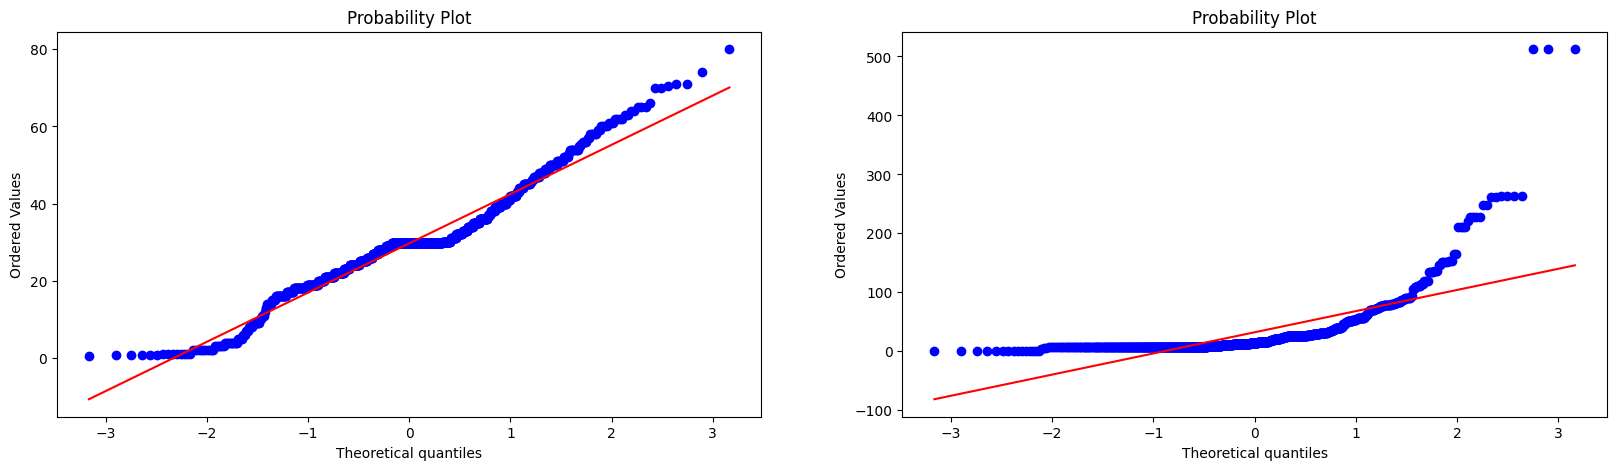

In [23]:
# plotting QQ plot
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
stats.probplot(df['Age'],dist='norm',plot=plt)

plt.subplot(1,2,2)
stats.probplot(df['Fare'],dist='norm',plot=plt)
plt.show()

**Before transformation**

In [24]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [25]:
#training our models
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

# predicting
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

# checking accuracy
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred2))

0.6480446927374302
0.6703910614525139


**After transformation**

In [26]:
# transforming our data
trnf= FunctionTransformer(np.log1p)
X_train_trnf = trnf.fit_transform(X_train)
X_test_trnf = trnf.transform(X_test)

In [27]:
# training our model
clf.fit(X_train_trnf,y_train)
clf2.fit(X_train_trnf,y_train)


#predicting
y_pred = clf.predict(X_test_trnf)
y_pred2 = clf2.predict(X_test_trnf)

# checking accuracy
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred2))



0.6815642458100558
0.6871508379888268


In [33]:
# applying cross validation
X_trnf= trnf.fit_transform(X)
print(cross_val_score(clf,X_trnf,y,cv=10).mean())
print(cross_val_score(clf2,X_trnf,y,cv=10).mean())


0.678027465667915
0.6599875156054931


In [41]:
# transforming by creating a transform function
def apply_transform(mode):
  X=df.iloc[:,1:3]
  y=df.iloc[:,0]

  trnf=ColumnTransformer([('log',FunctionTransformer(mode),['Fare'])],remainder='passthrough')
  X_trans=trnf.fit_transform(X)
  clf = LogisticRegression()

  print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

  plt.figure(figsize=(20,5))

  plt.subplot(121)
  stats.probplot(X['Fare'], dist="norm", plot=plt)
  plt.title('Fare Before Transform')

  plt.subplot(122)
  stats.probplot(X_trans[:,0], dist="norm", plot=plt)
  plt.title('Fare After Transform')

  plt.show()



Accuracy 0.6712609238451936


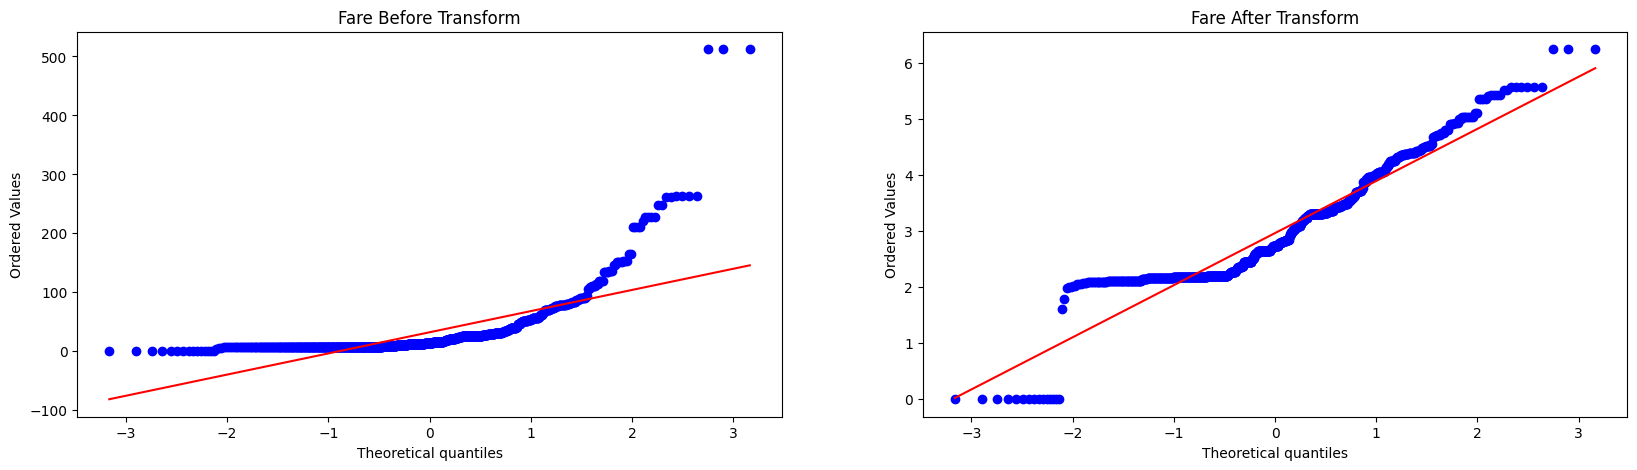

In [45]:
apply_transform(np.log1p)